In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modular_splicing.other_experiments.bits_in_postsparse import (
    accuracy_drop_vs_entropy_for_model,
)
from modular_splicing.models_for_testing.list import AM, FM

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
points = [1, 2, 3, 4, 8, -3]
adj_rbnsp = {
    seed: accuracy_drop_vs_entropy_for_model(AM.non_binarized_model(seed), points)
    for seed in (1, 2, 3, 4, 5)
}
rbnsp = {
    seed: accuracy_drop_vs_entropy_for_model(FM.non_binarized_model(seed), points)
    for seed in (1,)
}

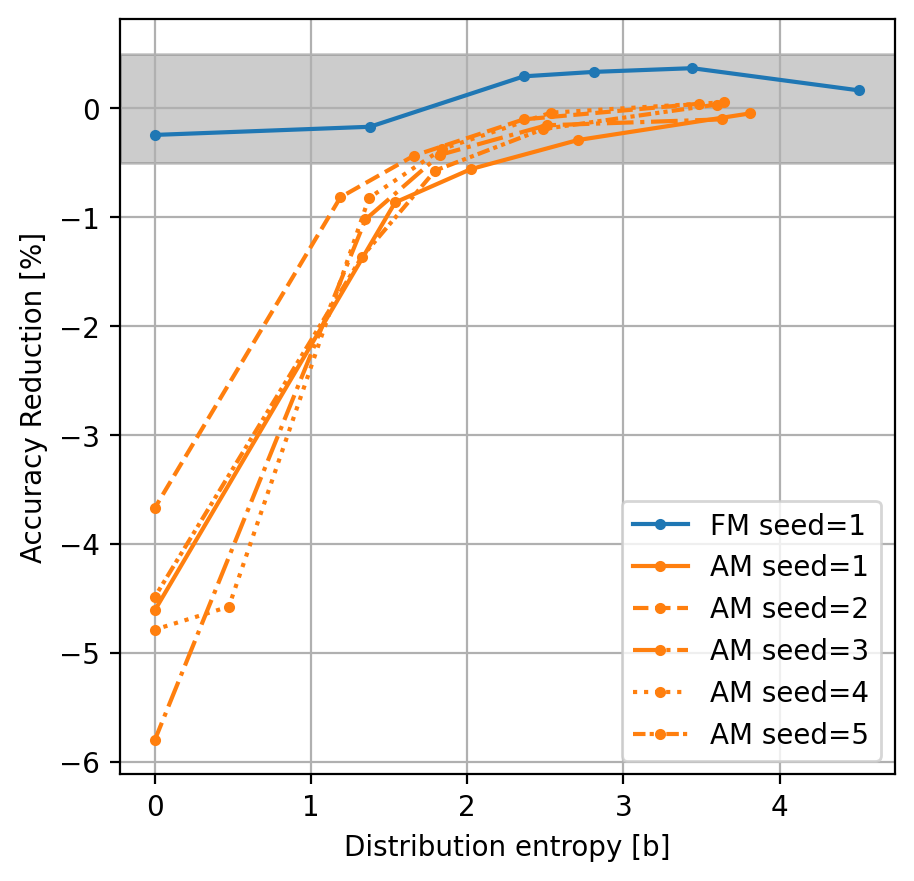

In [5]:
colors = list(plt.rcParams["axes.prop_cycle"].by_key()["color"])[::-1]
plt.figure(figsize=(5, 5), dpi=200)


def plot_all(data, name):
    for seed in data:
        plt.plot(
            data[seed]["e"],
            data[seed]["a"] * 100,
            marker=".",
            label=f"{name} seed={seed}",
            color=colors[-1],
            linestyle={1: "-", 2: "--", 3: "-.", 4: ":", 5: (0, (3, 1, 1, 1, 1, 1))}[
                seed
            ],
        )
    colors.pop()


plot_all(rbnsp, "FM")
plot_all(adj_rbnsp, "AM")

plt.axhspan(-0.5, 0.5, color="black", alpha=0.2)
plt.legend()
plt.xlabel("Distribution entropy [b]")
plt.ylabel("Accuracy Reduction [%]")
plt.grid()
plt.show()